In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import os
import missingno as mg

# Movie Dataset Analysis Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.cluster import KMeans

In [ ]:
# Set the style for seaborn
sns.set(style="white")

# Get the absolute path to the directory containing the notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))  # Or hardcode if needed

# Construct the full path to the CSV file
csv_path = os.path.join(notebook_dir, 'df_fusion.csv')

# Load the dataset
df = pd.read_csv(csv_path)

# Display full columns of the dataset
pd.set_option('display.max_columns', None)

# Display the first few row of the dataset
df.head()

,film_title,film_url,film_image_url,release_date,duration,age_classification,producers,director,top_stars,press_rating,viewer_rating,languages,distributor,year_of_production,film_nationality,filming_secrets,fr_entry_week,us_entry_week,fr_entries,us_entries,awards,budget,associated_genres,press_critics_count,viewer_critics_count,synopsis,film_id,release_season,duration_minutes,producers_count,producer_1,producer_2,producer_3,producer_4,producer_5,top_stars_count,top_star_1,top_star_2,top_star_3,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_period,fr_entry_week_iso_week,us_entry_week_period,us_entry_week_iso_week,fr_entries_num,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length
0,The Electric State,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/img/91...,2025-03-14,2h 08min,NaN,"Joe Russo,Anthony Russo,Christopher Markus,Ste...",Joe Russo,"Millie Bobby Brown,Chris Pratt,Anthony Mackie",2.0,2.6,Anglais,NaN,2025,NaN,-,NaN,NaN,NaN,NaN,NaN,-,"Aventure,Science Fiction",13 critiques,"1149 notes, 160 critiques",Une adolescente réalise que son nouvel ami rob...,261389,Spring,128.0,4,Joe Russo,Anthony Russo,Christopher Markus,Stephen McFeely,NaN,3,Millie Bobby Brown,Chris Pratt,Anthony Mackie,1,0,0,NaN,0,NaN,0,0,0,0,0,0,2,13,1149,160,210
1,Un parfait inconnu,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/img/7b...,2025-01-29,2h 20min,Tout public,"James Mangold,Jay Cocks",James Mangold,"Timothée Chalamet,Edward Norton,Elle Fanning",3.9,4.1,Anglais,The Walt Disney Company France,2024,NaN,10 anecdotes,29 janvier au 5 février 2025,27 au 30 décembre 2024,308 895,11 655 553,20 nominations,-,"Biopic,Drame,Musical",38 critiques,"5102 notes, 563 critiques","New York, 1961. Alors que la scène musicale es...",280195,Winter,140.0,2,James Mangold,Jay Cocks,NaN,NaN,NaN,3,Timothée Chalamet,Edward Norton,Elle Fanning,1,0,10,29 janvier au 5 février 2025,0,27/12/2024 – 30/12/2024,52,308895,11655553,0,20,20,3,38,5102,563,529
2,Dis-moi juste que tu m'aimes,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img5.acsta.net/c_310_420/img/42...,2025-02-19,1h 51min,Tout public,Anne Le Ny,Anne Le Ny,"Omar Sy,Élodie Bouchez,Vanessa Paradis",3.0,3.0,Français,SND,2024,NaN,9 anecdotes,05 au 12 mars 2025,NaN,62 556,NaN,NaN,-,Drame,25 critiques,"1029 notes, 163 critiques","Au bout de quinze ans de mariage, une crise me...",321257,Winter,111.0,1,Anne Le Ny,NaN,NaN,NaN,NaN,3,Omar Sy,Élodie Bouchez,Vanessa Paradis,1,0,9,05/03/2025 – 12/03/2025,10,NaN,0,62556,0,0,0,0,1,25,1029,163,554
3,Magma,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/img/01...,2025-03-19,1h 25min,Tout public,"Cyprien Vial,Nicolas Pleskof",Cyprien Vial,"Marina Foïs,Théo Christine,Mathieu Demy",2.9,3.2,Français,Pyramide Distribution,2025,NaN,6 anecdotes,NaN,NaN,NaN,NaN,NaN,-,Drame,29 critiques,"315 notes, 68 critiques",Katia Reiter dirige l’Observatoire Volcanologi...,318223,Spring,85.0,2,Cyprien Vial,Nicolas Pleskof,NaN,NaN,NaN,3,Marina Foïs,Théo Christine,Mathieu Demy,1,0,6,NaN,0,NaN,0,0,0,0,0,0,1,29,315,68,407
4,Les Condés,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img2.acsta.net/c_310_420/img/58...,2025-03-26,1h 24min,Tout public,"Nordine Salhi,Ryad Luc Montel",Nordine Salhi,"Nordine Salhi,Ichem Bougheraba,Arriles Amrani",1.6,1.6,Français,Apollo Films,2025,NaN,6 anecdotes,NaN,NaN,NaN,NaN,NaN,-,Comédie,5 critiques,"115 notes, 27 critiques","À Marseille, la Police Nationale n’y arrive pl...",1000017317,Spring,84.0,2,Nordine Salhi,Ryad Luc Montel,NaN,NaN,NaN,3,Nordine Salhi,Ichem Bougheraba,Arriles Amrani,1,0,6,NaN,0,NaN,0,0,0,0,0,0,1,5,115,27,302


add yes or no field for award, nominations, film secrets

In [ ]:
sns.displot(df_fusion['opening_week_france_num'], kde=True, rug=True)
plt.title('Distribution of FR Entries')
plt.xlabel('Number of Entries')
plt.show()

# 'age_classification', 'opening_week_france_num', 'release_date_france', 'release_date_usa', 'director', 'main_genre_jpboxoffice',
# 'broadcast_category', 'release_season', 'producers_list', 'top_stars_list', 'languages_list', 'nationality_list',
# 'associated_genres_allocine_list',

In [ ]:
# # Testing if 'age_classification' affects 'fr_entries'

# anova_result = stats.f_oneway(
#     df_analysis[df_analysis['age_classification'] == 'Tout public']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Interdit - 12 ans']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Tout public avec avertissement']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Interdit - 16 ans']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Interdit - 12 ans avec avertissement']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Interdit - 16 ans avec avertissement']['opening_week_france_num'],
#     df_analysis[df_analysis['age_classification'] == 'Interdit - 18 ans']['opening_week_france_num'],
# )

# # Convert result to DataFrame
# anova_df = pd.DataFrame({
#     'F-statistic': [anova_result.statistic],
#     'p-value': [anova_result.pvalue]
# })

# print(anova_df)

In [ ]:
# # Group and filter groups with at least 5 samples
# grouped = df_analysis.groupby('age_classification')['opening_week_france_num']
# valid_groups = [group.dropna() for name, group in grouped if len(group.dropna()) >= 5]

# # Run ANOVA on valid groups
# anova_result = stats.f_oneway(*valid_groups)

# # Format result as DataFrame
# anova_df = pd.DataFrame({
#     "F-statistic": [anova_result.statistic],
#     "p-value": [anova_result.pvalue]
# })

# print(anova_df)

In [ ]:
# from scipy import stats
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Group and filter groups with at least 5 samples
# grouped = df_analysis.groupby('age_classification')['opening_week_france_num']
# valid_data = [(name, group.dropna()) for name, group in grouped if len(group.dropna()) >= 5]
# valid_groups = [group for _, group in valid_data]
# valid_group_names = [name for name, _ in valid_data]

# # Run ANOVA
# anova_result = stats.f_oneway(*valid_groups)

# # Format result as DataFrame
# anova_df = pd.DataFrame({
#     "F-statistic": [anova_result.statistic],
#     "p-value": [anova_result.pvalue]
# })
# print(anova_df)

# # === Post-hoc test (Tukey HSD) ===
# # Filter original dataframe to include only valid group names
# filtered_df = df_analysis[df_analysis['age_classification'].isin(valid_group_names)]

# tukey = pairwise_tukeyhsd(
#     endog=filtered_df['opening_week_france_num'],
#     groups=filtered_df['age_classification'],
#     alpha=0.05
# )

# print(tukey.summary())

In [ ]:

# pg.welch_anova(dv='opening_week_france_num', between='age_classification', data=df_analysis)

In [ ]:
# from scipy.stats import kruskal

# grouped = df_analysis.groupby('main_genre_jpboxoffice')['opening_week_france_num']
# valid_groups = [group.dropna() for name, group in grouped if len(group.dropna()) >= 5]
# kw_result = kruskal(*valid_groups)
# print(f"Kruskal-Wallis statistic: {kw_result.statistic}, p-value: {kw_result.pvalue}")

In [3]:
# Subset the dataset to include only the relevant columns
df_subset = df[['film_id', 'film_title', 'release_date', 'age_classification', 
       'press_rating', 'viewer_rating', 'distributor', 'year_of_production', 
       'release_season','duration_minutes', 'producers_count', 
       'top_stars_count', 'language_count', 'film_nationality_count', 'filming_secrets_num', 
       'fr_entry_week_iso_week', 'us_entry_week_iso_week',
       'fr_entries_num', 'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count', 'press_critics_count_num', 'viewer_notes',
       'viewer_critiques', 'synopsis_length']]

In [4]:
# Extract the film title length and character length from the film_title
df_subset['film_title_length'] = df_subset['film_title'].apply(lambda x: len((x.split())))
df_subset['film_title_chracter_length'] = df_subset['film_title'].apply(lambda x: len(x))

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_16896/2213797150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['film_title_length'] = df_subset['film_title'].apply(lambda x: len((x.split())))
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_16896/2213797150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['film_title_chracter_length'] = df_subset['film_title'].apply(lambda x: len(x))


In [5]:
# Drop the original film_title column
df_subset.drop(columns=['film_title', 'distributor', 'release_date', 'age_classification'], inplace=True)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_16896/2557536643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(columns=['film_title', 'distributor', 'release_date', 'age_classification'], inplace=True)


In [6]:
df_subset.head()

,film_id,press_rating,viewer_rating,year_of_production,release_season,duration_minutes,producers_count,top_stars_count,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_iso_week,us_entry_week_iso_week,fr_entries_num,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length,film_title_length,film_title_chracter_length
0,261389,2.0,2.6,2025,Spring,128.0,4,3,1,0,0,0,0,0,0,0,0,0,2,13,1149,160,210,3,18
1,280195,3.9,4.1,2024,Winter,140.0,2,3,1,0,10,0,52,308895,11655553,0,20,20,3,38,5102,563,529,3,18
2,321257,3.0,3.0,2024,Winter,111.0,1,3,1,0,9,10,0,62556,0,0,0,0,1,25,1029,163,554,5,28
3,318223,2.9,3.2,2025,Spring,85.0,2,3,1,0,6,0,0,0,0,0,0,0,1,29,315,68,407,1,5
4,1000017317,1.6,1.6,2025,Spring,84.0,2,3,1,0,6,0,0,0,0,0,0,0,1,5,115,27,302,2,10


<Axes: >

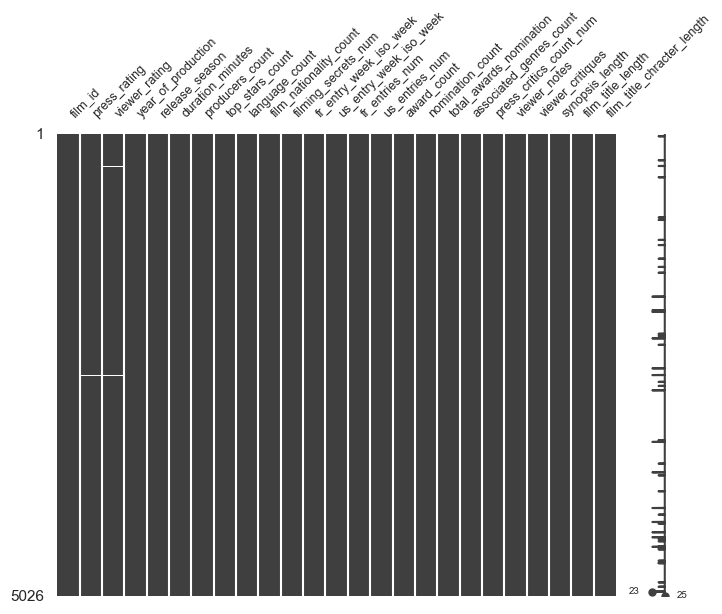

In [7]:
mg.matrix(df_subset, figsize=(8, 6), fontsize=9)

In [9]:
# Drop rows with missing values in the 'age_classification' columns
df_subset.dropna(subset=['press_rating', 'viewer_rating', 'release_season','duration_minutes'], inplace = True)

# Reset the index after dropping 
df_subset.reset_index(drop=True, inplace=True)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_16896/3697859944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(subset=['press_rating', 'viewer_rating', 'release_season','duration_minutes'], inplace = True)


<Axes: >

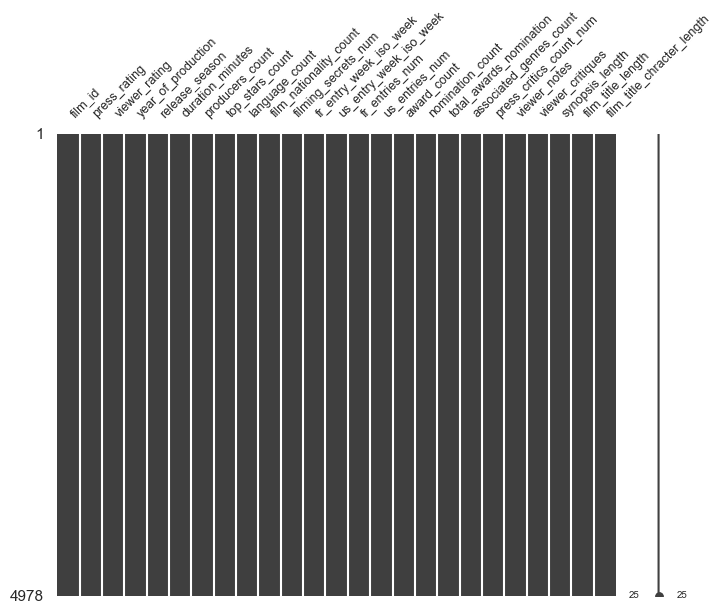

In [10]:
mg.matrix(df_subset, figsize=(8, 6), fontsize=9)

In [ ]:
df_subset = df_subset[['fr_entries_num', 'film_id', 'press_rating', 'viewer_rating',
       'year_of_production', 'release_season', 'duration_minutes',
       'producers_count', 'top_stars_count', 'language_count',
       'film_nationality_count', 'filming_secrets_num',
       'fr_entry_week_iso_week', 'us_entry_week_iso_week',
       'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count',
       'press_critics_count_num', 'viewer_notes', 'viewer_critiques',
       'synopsis_length', 'film_title_length', 'film_title_chracter_length']]

In [12]:
df_subset.head()

,fr_entries_num,film_id,age_classification,press_rating,viewer_rating,year_of_production,release_season,duration_minutes,producers_count,top_stars_count,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_iso_week,us_entry_week_iso_week,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length,film_title_length,film_title_chracter_length
0,0,1000001269,Tout public,2.8,2.5,2025,Spring,86,4,3,1,0,8,0,0,0,0,0,0,1,4,566,241,717,1,11
1,108029,323031,Tout public,3.8,4.1,2024,Winter,89,2,3,1,0,12,10,0,0,1,1,2,1,24,2612,715,280,3,14
2,62059,1000000974,Tout public,4.2,4.1,2024,Spring,110,2,3,1,0,11,10,0,0,0,0,0,1,30,1638,165,283,2,9
3,128314,313781,Tout public,4.0,4.2,2024,Winter,105,2,3,1,2,7,10,0,0,0,0,0,1,34,3156,383,219,1,13
4,142318,269838,Tout public avec avertissement,4.3,4.0,2024,Winter,214,2,3,2,3,13,7,4,2873057,11,17,28,1,42,3985,488,274,2,13


Text(0.5, 1.0, 'Distribution of French Entries Number')

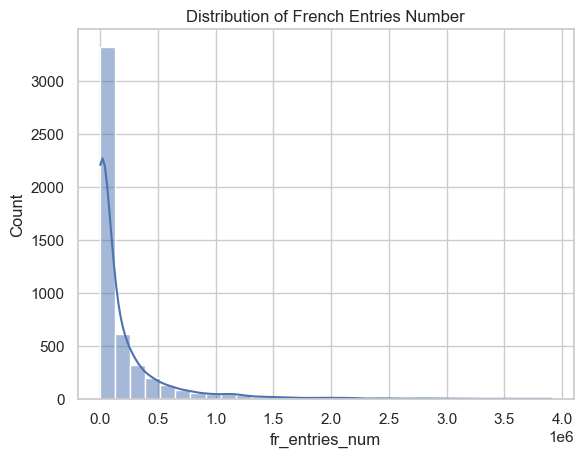

In [11]:
sns.histplot(data=df_subset, x='fr_entries_num', bins=30, kde=True)
plt.title('Distribution of French Entries Number')

In [13]:
df_subset.head()

,film_id,press_rating,viewer_rating,year_of_production,release_season,duration_minutes,producers_count,top_stars_count,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_iso_week,us_entry_week_iso_week,fr_entries_num,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length,film_title_length,film_title_chracter_length
0,261389,2.0,2.6,2025,Spring,128.0,4,3,1,0,0,0,0,0,0,0,0,0,2,13,1149,160,210,3,18
1,280195,3.9,4.1,2024,Winter,140.0,2,3,1,0,10,0,52,308895,11655553,0,20,20,3,38,5102,563,529,3,18
2,321257,3.0,3.0,2024,Winter,111.0,1,3,1,0,9,10,0,62556,0,0,0,0,1,25,1029,163,554,5,28
3,318223,2.9,3.2,2025,Spring,85.0,2,3,1,0,6,0,0,0,0,0,0,0,1,29,315,68,407,1,5
4,1000017317,1.6,1.6,2025,Spring,84.0,2,3,1,0,6,0,0,0,0,0,0,0,1,5,115,27,302,2,10


In [14]:
# One-Hot Encode "age_classification" column
df_subset = pd.get_dummies(df_subset, columns=['release_season']).astype(int)

In [15]:
df_subset.columns

Index(['film_id', 'press_rating', 'viewer_rating', 'year_of_production',
       'duration_minutes', 'producers_count', 'top_stars_count',
       'language_count', 'film_nationality_count', 'filming_secrets_num',
       'fr_entry_week_iso_week', 'us_entry_week_iso_week', 'fr_entries_num',
       'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count',
       'press_critics_count_num', 'viewer_notes', 'viewer_critiques',
       'synopsis_length', 'film_title_length', 'film_title_chracter_length',
       'release_season_Autumn', 'release_season_Spring',
       'release_season_Summer', 'release_season_Winter'],
      dtype='object')

In [16]:
# Separate feature and target parameters
x_model_features = df_subset[['film_id', 'press_rating', 'viewer_rating', 'year_of_production',
       'duration_minutes', 'producers_count', 'top_stars_count',
       'language_count', 'film_nationality_count', 'filming_secrets_num',
       'fr_entry_week_iso_week', 'us_entry_week_iso_week',
       'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count',
       'press_critics_count_num', 'viewer_notes', 'viewer_critiques',
       'synopsis_length', 'film_title_length', 'film_title_chracter_length',
       'release_season_Autumn', 'release_season_Spring',
       'release_season_Summer', 'release_season_Winter']]

y_target_feature = df_subset[['fr_entries_num']]

In [17]:
# Transform (to normalize distribution as much as possible)
# Scale features (to have feature parameters on the same scale)

from sklearn.preprocessing import StandardScaler 

x_model_features_log = np.log1p(x_model_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the input data (X)
x_scaled = scaler.fit_transform(x_model_features_log)

In [18]:
# Transform target 
y_log = np.log1p(y_target_feature)

In [19]:
# Calculate f_statistic 
from sklearn.feature_selection import f_regression

f_statistic, p_values = f_regression(x_scaled,y_log)

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Display f_statistic
features = pd.DataFrame({"Parameters": x_model_features.columns,
              "f_statistic": f_statistic,
              "p-value": p_values
              })

# Sort selected features
features.sort_values(by= ['f_statistic', 'p-value'], ascending=False).reset_index(drop=True)

,Parameters,f_statistic,p-value
0,fr_entry_week_iso_week,4672.550848,0.000000e+00
1,filming_secrets_num,3997.912594,0.000000e+00
2,viewer_critiques,2139.576838,0.000000e+00
3,us_entries_num,1496.739495,1.668247e-286
4,us_entry_week_iso_week,1342.259069,2.195312e-260
5,press_critics_count_num,1145.734004,3.248747e-226
6,viewer_notes,959.018396,1.030576e-192
7,year_of_production,871.894888,1.022620e-176
8,film_id,252.860214,1.416481e-55
9,nomination_count,182.004524,9.144776e-41


In [21]:
# Select features with p-value < 0.05
selected_features = features[features['p-value'] < 0.05].sort_values(by = 'f_statistic', ascending = False)['Parameters'].values
selected_features

array(['fr_entry_week_iso_week', 'filming_secrets_num',
       'viewer_critiques', 'us_entries_num', 'us_entry_week_iso_week',
       'press_critics_count_num', 'viewer_notes', 'year_of_production',
       'film_id', 'nomination_count', 'total_awards_nomination',
       'award_count', 'release_season_Summer', 'release_season_Spring',
       'film_nationality_count', 'synopsis_length', 'film_title_length',
       'film_title_chracter_length', 'release_season_Winter',
       'duration_minutes', 'release_season_Autumn', 'language_count'],
      dtype=object)

## Checking for multicolinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled_df = pd.DataFrame(x_scaled[ : , :14], columns= ['year_of_production', 'fr_entry_week_iso_week',
       'release_season_Spring', 'viewer_notes', 'total_awards_nomination',
       'nomination_count', 'release_season_Winter', 'award_count',
       'viewer_critiques', 'press_rating', 'press_critics_count_num',
       'us_entry_week_iso_week', 'viewer_rating', 'producers_count'])
       
variables=x_scaled_df[['year_of_production', 'fr_entry_week_iso_week',
       'release_season_Spring', 'viewer_notes', 'total_awards_nomination',
       'nomination_count', 'release_season_Winter', 'award_count',
       'viewer_critiques', 'press_rating', 'press_critics_count_num',
       'us_entry_week_iso_week', 'viewer_rating', 'producers_count']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [34]:
vif

,VIF,Features
0,3.702648,year_of_production
1,7.305678,fr_entry_week_iso_week
2,6.284714,release_season_Spring
3,5.733010,viewer_notes
4,3.137078,total_awards_nomination
5,2.338805,nomination_count
6,2.757686,release_season_Winter
7,3.221600,award_count
8,2.704015,viewer_critiques
9,1.868877,press_rating


In [41]:
# Define features and target
selected_variables = df_subset[['fr_entries_num', 'year_of_production', 'fr_entry_week_iso_week', 
                                'release_season_Spring', 'release_season_Winter', 
                                'us_entry_week_iso_week', 'producers_count']]

X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
selected_variables = df_subset[['fr_entries_num', 'fr_entry_week_iso_week', 'filming_secrets_num', 
                                'year_of_production', 'producers_count',  'synopsis_length',
                                'film_title_length',
                                'duration_minutes', 'release_season_Autumn',                         
                                ]]

# 'release_season_Summer', 'release_season_Spring', 'film_nationality_count', 'film_id',

X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

# Identify numerical columns (you can adjust this if you later include categorical variables)
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Pipeline: log transform + scaling
num_pipeline = Pipeline([
    #('log_transform', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features)
    ]
)

# Apply transformations
X_encoded = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Statsmodels: Add intercept and fit OLS
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Scikit-learn regression model
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Predict
y_pred = model_sk.predict(X_test)

# Evaluation
r_squared = model_sk.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


                            OLS Regression Results                            
Dep. Variable:         fr_entries_num   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          1.37e-296
Time:                        23:58:56   Log-Likelihood:                -56145.
No. Observations:                3982   AIC:                         1.123e+05
Df Residuals:                    3973   BIC:                         1.124e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.883e+05   5101.517     36.910      0.0

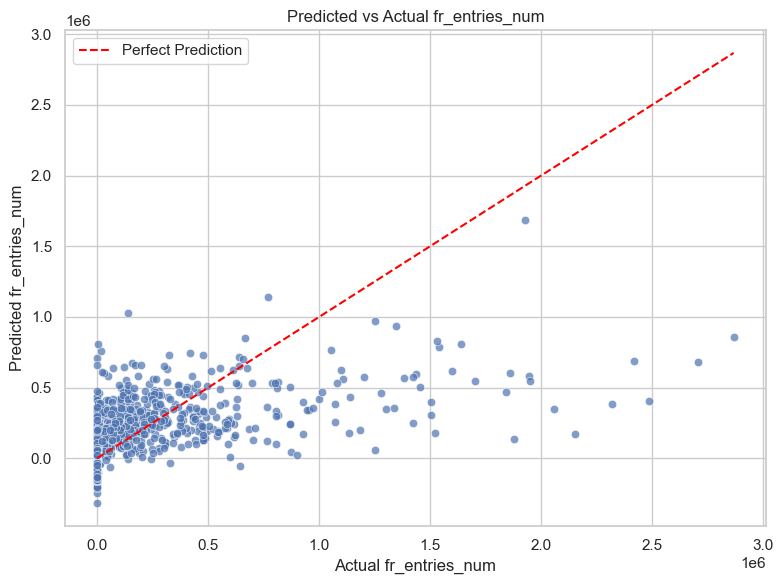

In [27]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), alpha=0.7)

# Add diagonal reference line
max_val = max(y_test.max().values[0], y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Predicted vs Actual fr_entries_num")
plt.xlabel("Actual fr_entries_num")
plt.ylabel("Predicted fr_entries_num")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define features and target
selected_variables = df_subset[['fr_entries_num', 'year_of_production', 'fr_entry_week_iso_week', 'release_season_Spring', 'release_season_Winter', 
       'us_entry_week_iso_week', 'producers_count']]

X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

# 1. Add Polynomial Features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=42)

# 3. Define models and hyperparameters for GridSearch

# RandomForest Regressor hyperparameters
# rf_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }

# # GradientBoosting Regressor hyperparameters
# gb_params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 0.9, 1.0]
# }

# SVR hyperparameters
svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# 4. Initialize the models
# rf_model = RandomForestRegressor(random_state=42)
# gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# 5. Set up GridSearchCV for each model
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, n_jobs=-1, verbose=2)
# grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, n_jobs=-1, verbose=2)
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=svr_params, cv=5, n_jobs=-4, verbose=2)

# 6. Fit the models using GridSearch
# grid_search_rf.fit(X_train, y_train)
# grid_search_gb.fit(X_train, y_train)
grid_search_svr.fit(X_train, y_train)

# 7. Get the best parameters
# print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
# print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best parameters for SVR: {grid_search_svr.best_params_}")

# 8. Make predictions using the best models
# y_pred_rf = grid_search_rf.predict(X_test)
# y_pred_gb = grid_search_gb.predict(X_test)
y_pred_svr = grid_search_svr.predict(X_test)

# 9. Evaluate each model
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

# # Evaluate Random Forest
# r2_rf, rmse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)
# print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

# # Evaluate Gradient Boosting
# r2_gb, rmse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)
# print(f"Gradient Boosting - R²: {r2_gb:.3f}, RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}")

# Evaluate SVR
r2_svr, rmse_svr, mae_svr = evaluate_model(y_test, y_pred_svr)
print(f"SVR - R²: {r2_svr:.3f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}")

In [ ]:
# # --- 4. Predictive Modeling ---
# def predict_revenue(df):
#     df_model = df[['budget', 'duration_minutes', 'viewer_rating']].dropna()
#     X = df_model.drop('viewer_rating', axis=1)
#     y = df_model['viewer_rating']
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)

#     print("MSE:", mean_squared_error(y_test, preds))
#     print("R2 Score:", r2_score(y_test, preds))